In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import sklearn.datasets
import warnings


warnings.filterwarnings('ignore')

In [33]:
DataSet = sklearn.datasets.load_boston()
X = pd.DataFrame(scale(DataSet.data, axis=1), columns=DataSet.feature_names)
target = pd.DataFrame(DataSet.target, columns=['target'])

In [44]:
def myFunc(X, target, h = np.linspace(1., 10., 10)):
    outDict = dict()
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for i in h:
        KNR = KNeighborsRegressor(n_neighbors=5, weights='distance', p=i)
        cvs = cross_val_score(KNR, X, target, cv=kf, scoring='mean_squared_error')
        outDict[i] = cvs.mean()
    return outDict

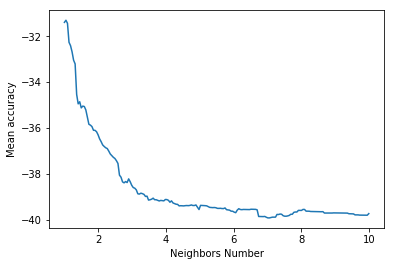

Max Accuracy =  -31.303499079067507
Optimum P Value =  1.0452261306532664


In [49]:
h = np.linspace(1., 10., 200)
a = myFunc(X, target, h)

# График
plt.plot(list(a.keys()), list(a.values()))
plt.ylabel('Mean accuracy')
plt.xlabel('Neighbors Number')
plt.show()

print('Max Accuracy = ', max(list(a.values())))
print('Optimum P Value = ', list(a.keys())[list(a.values()).index(max(list(a.values())))])

# Запись ответа
output1 = open('week2.2_1qw.txt', 'w')
print(
    round(list(a.keys())[list(a.values()).index(max(list(a.values())))], 2),
    file=output1, 
    end='', 
    sep=' '
)
output1.close()